In [29]:
import networkx as nx

from fair_cc_functions import *
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

In [3]:
def greedy_puzzle(red_g, blue_g, iterations=10):
    # 2) perform cc-pivot on each subgraph, clusters sorted
    blue_cluster = sorted(cc_pivot(blue_g), key=len)
    red_cluster = sorted(cc_pivot(red_g), key=len)

    # 3) get size of clustering
    min_c = np.min([len(blue_cluster), len(red_cluster)])
    max_c = np.max([len(blue_cluster), len(red_cluster)])
    if len(red_cluster) > len(blue_cluster):
        big_c = red_cluster
        small_c = blue_cluster
    else:
        big_c = blue_cluster
        small_c = red_cluster

    # 4) greedy algo and sort the largest clusters together
    final_cluster=[]
    for i in range(1, min_c+1):
        final_cluster.append(big_c[-i] + small_c[-i])

    for i in range(max_c-min_c-1, -1, -1):
        final_cluster[-((i)%min_c+1)].extend(big_c[i])
    return final_cluster, red_cluster, blue_cluster

In [34]:
def stats_puzzle(n, red_type, blue_type, iters=10):
    # 1) generate 2 subgraphs (one red, one blue)
    cluster_bal = []
    red_cost, blue_cost = [], []
    cluster_cost = []
    for i in range(10, n, 2):
        _, red_g, blue_g = generate_red_blue_graph(i, red_type, blue_type)
        red_g.add_edges_from(red_g.edges, weight=1)
        red_g.add_edges_from(nx.complement(red_g).edges, weight=0)
        blue_g.add_edges_from(blue_g.edges, weight=1)
        blue_g.add_edges_from(nx.complement(blue_g).edges, weight=0)
        composed_graph = nx.compose(red_g, blue_g)
        bal, c, cost_b, cost_r = [], [], [], []
        for j in range(iters):
            fin_c, r_cl, b_cl = greedy_puzzle(red_g, blue_g)
            bal.append(balance(fin_c, composed_graph))
            c.append(cost(fin_c, composed_graph))
            cost_b.append(cost(b_cl, blue_g))
            cost_r.append(cost(r_cl, red_g))
        cluster_bal.append(bal)
        cluster_cost.append(c)
        red_cost.append(cost_r)
        blue_cost.append(cost_b)
    return cluster_bal, cluster_cost, red_cost, blue_cost

In [35]:
star_star_bal, star_star_c, red_star_c, blue_star_c = stats_puzzle(61, 'star', 'star', iters=20)

In [99]:
probs = []
squr_sum =[]
for m in range(1, 100):
    prob = 0
    squrs = 0
    for i in range(1, m+1):
        prob_m=1
        for j in range(m, m-i, -1):
            prob_m = prob_m*(1/(j*j))
        prob += prob_m
        squrs += 1/m**2
    probs.append(prob)
    squr_sum.append(squrs)
x = [1/i for i in range(1, 100)]
p = [1/np.math.factorial(i) for i in range(1,100)]
squr = [1/i**2 for i in range(1,100)]

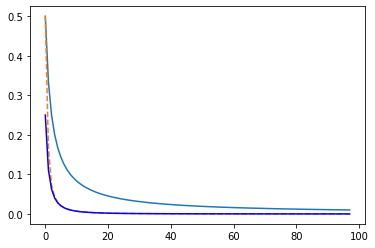

In [97]:
plt.plot(x[1:])
plt.plot(probs[1:], '--')
#plt.plot(p[10:], '-.')
plt.plot(squr[1:], color='blue')
plt.show()

In [100]:
print([i-j for i,j in zip(squr_sum, probs)])

[0.0, 0.0, 0.16666666666666663, 0.17708333333333334, 0.15708333333333335, 0.13769675925925928, 0.12185775699168555, 0.10904688459585223, 0.0985684800567389, 0.08987457368945627, 0.0825609468899955, 0.07633091566653408, 0.07096448273569943, 0.06629612962149296, 0.06219941136974632, 0.05857629978399641, 0.055349744981951526, 0.05245841424558699, 0.04985291650606659, 0.04749305334389675, 0.04534578923660747, 0.04338373293722637, 0.04158398712189542, 0.039927266885854754, 0.03839721696035069, 0.03697987753988218, 0.03566326246787151, 0.03443702324672302, 0.03329217923606709, 0.032220899356239306, 0.03121632421022156, 0.030272420175482512, 0.02938385897169467, 0.02854591767185869, 0.027754395226910988, 0.02700554241254281, 0.026296002749915812, 0.025622762448561567, 0.024983107806032124, 0.02437458880135314, 0.023794987857704543, 0.023242292938750138, 0.022714674293742167, 0.022210464287365814, 0.021728139847684017, 0.021266307144435476, 0.020823688174155558, 0.020399108981089167, 0.0199914

[(1, 8), (2, 9), (4, 5), (0, 6), (3, 7)]
[[(0, 6), (1, 8), (2, 9), (4, 5), (3, 7)]]


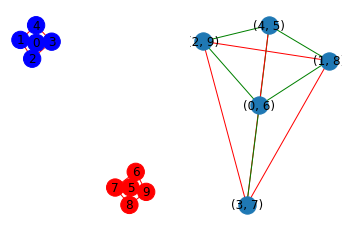

In [105]:
g, r, b = generate_red_blue_graph(10, 'star', 'star')
fairlets = create_fairlets(g)
fair_g = nx.Graph()
fair_g.add_nodes_from(fairlets)
E_p, E_m = create_fairlet_relations_incomplete(fairlets, g)
fair_g.add_weighted_edges_from(E_p)
fair_g.add_weighted_edges_from(E_m)

cluster = cc_pivot(fair_g)

fig, ax = plt.subplots(1,2)
draw_graph(g, ax[0])
draw_graph(fair_g, ax[1])
print(fairlets)
print(cluster)